In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',25)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading data

data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data_copy = data.copy()
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# Separating salary transactions from others

salary_data = data[data['txn_description']=='PAY/SALARY']
salary_data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [4]:
# Customer salary for 3 months

salary_data.groupby('customer_id')['amount'].sum()

customer_id
CUS-1005756958    12616.11
CUS-1117979751    25050.55
CUS-1140341822    11499.06
CUS-1147642491    22248.07
CUS-1196156254    27326.11
                    ...   
CUS-72755508       8703.84
CUS-809013380     13481.91
CUS-860700529     10851.72
CUS-880898248      8603.88
CUS-883482547     27842.22
Name: amount, Length: 100, dtype: float64

In [5]:
# Calculating annual salary for each customer w.r.t. account number

annual_salary = (salary_data.groupby('customer_id')['amount'].sum()*4)
df = pd.DataFrame(annual_salary)
df.columns = ['annual_salary']

In [6]:
# Adding age column

df['age'] = data.groupby('customer_id')['age'].mean()

In [7]:
# Transaction Description value counts

data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [8]:
# Point of Sale

pos_data = data[(data.txn_description == "POS") | (data.txn_description == "SALES-POS")]
df['pos_mean_3months'] = pos_data.groupby("customer_id")['amount'].mean()

In [9]:
df.head()

,annual_salary,age,pos_mean_3months
customer_id,,,
CUS-1005756958,50464.44,53,37.726250
CUS-1117979751,100202.20,21,76.458077
CUS-1140341822,45996.24,28,67.531385
CUS-1147642491,88992.28,34,51.128289
CUS-1196156254,109304.44,34,30.310491


In [10]:
# Payment sum by customers for three months

payment_data = data[data.txn_description == "PAYMENT"]
df['payment'] = payment_data.groupby("customer_id")['amount'].sum()

In [11]:
# Latest balance extraction

latest_dates = data.groupby("customer_id")['date'].max()
latest_dates

customer_id
CUS-1005756958   2018-10-30
CUS-1117979751   2018-10-31
CUS-1140341822   2018-10-31
CUS-1147642491   2018-10-31
CUS-1196156254   2018-10-31
                    ...    
CUS-72755508     2018-10-31
CUS-809013380    2018-10-30
CUS-860700529    2018-10-31
CUS-880898248    2018-10-29
CUS-883482547    2018-10-31
Name: date, Length: 100, dtype: datetime64[ns]

In [12]:
# Extracting latest balance of customers 

balance_df = pd.merge(pd.DataFrame(latest_dates).reset_index().set_index(['customer_id','date']),data.set_index(['customer_id','date']),left_index=True,right_index=True,how='left')
df['current_balance'] = balance_df.groupby(level=0)['balance'].mean()

In [13]:
df.head()

,annual_salary,age,pos_mean_3months,payment,current_balance
customer_id,,,,,
CUS-1005756958,50464.44,53,37.726250,1296.0,9310.03
CUS-1117979751,100202.20,21,76.458077,3957.0,18387.41
CUS-1140341822,45996.24,28,67.531385,852.0,6820.26
CUS-1147642491,88992.28,34,51.128289,2597.0,15387.21
CUS-1196156254,109304.44,34,30.310491,3017.0,30913.87


In [14]:
# Skewness

for i in df.columns:
    print("\nSkewness of {0} is : {1}\n".format(i,df[i].skew()))
    


Skewness of annual_salary is : 0.9017026561764498


Skewness of age is : 1.2424312117018497


Skewness of pos_mean_3months is : 3.1108129315660498


Skewness of payment is : 0.8504526941197579


Skewness of current_balance is : 4.818245818597261



In [15]:
# Correlation

df.corr()

,annual_salary,age,pos_mean_3months,payment,current_balance
annual_salary,1.000000,-0.036504,-0.000346,0.630678,0.262994
age,-0.036504,1.000000,0.199986,0.026884,0.226067
pos_mean_3months,-0.000346,0.199986,1.000000,0.108599,0.352983
payment,0.630678,0.026884,0.108599,1.000000,0.098260
current_balance,0.262994,0.226067,0.352983,0.098260,1.000000


# Univariate Analysis

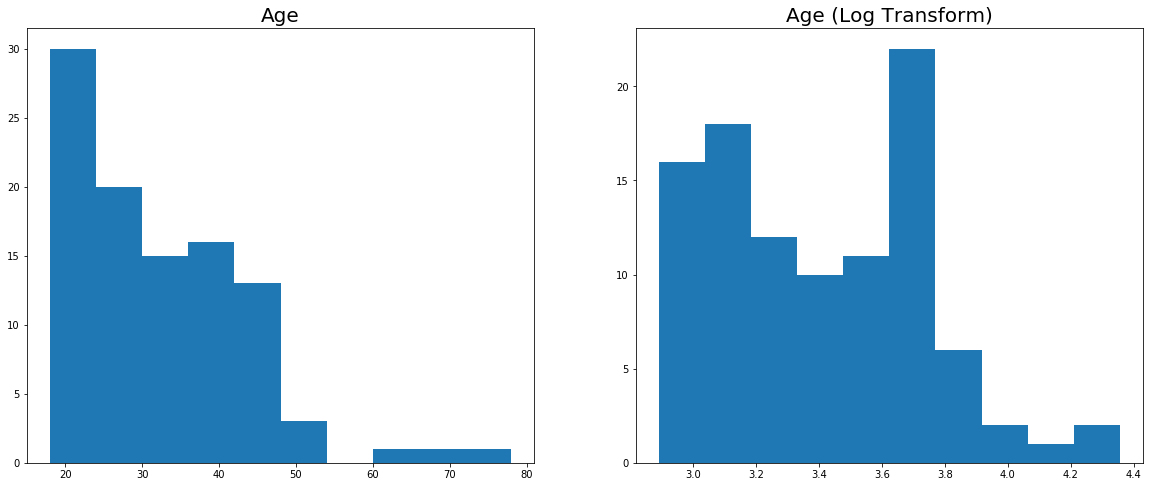

In [16]:
# Histogram for Age

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=[20,8])

ax1.hist(df.age)
ax1.set_title("Age",fontsize=20)
ax2.hist(np.log(df.age))
ax2.set_title("Age (Log Transform)",fontsize=20);

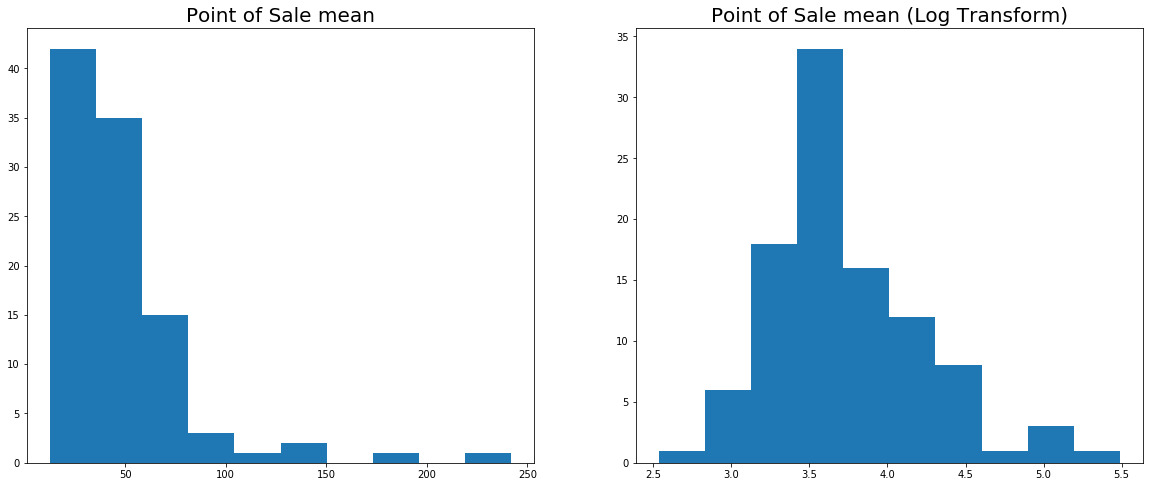

In [17]:
# Histogram for Pos

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=[20,8])

ax1.hist(df.pos_mean_3months)
ax1.set_title("Point of Sale mean",fontsize=20)
ax2.hist(np.log(df.pos_mean_3months))
ax2.set_title("Point of Sale mean (Log Transform)",fontsize=20);

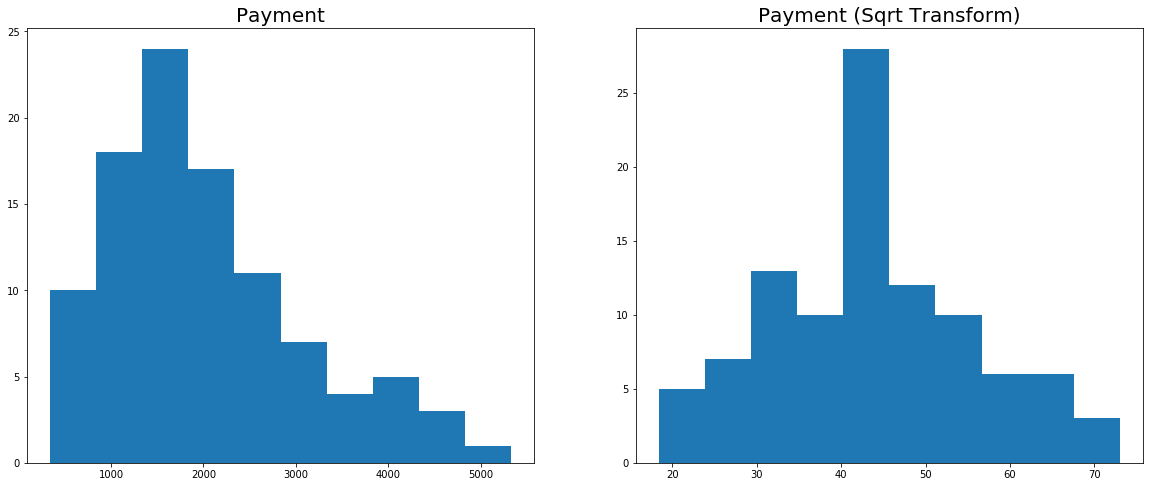

In [18]:
# Payment

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=[20,8])

ax1.hist(df.payment)
ax1.set_title("Payment",fontsize=20)
ax2.hist(np.sqrt(df.payment))
ax2.set_title("Payment (Sqrt Transform)",fontsize=20);

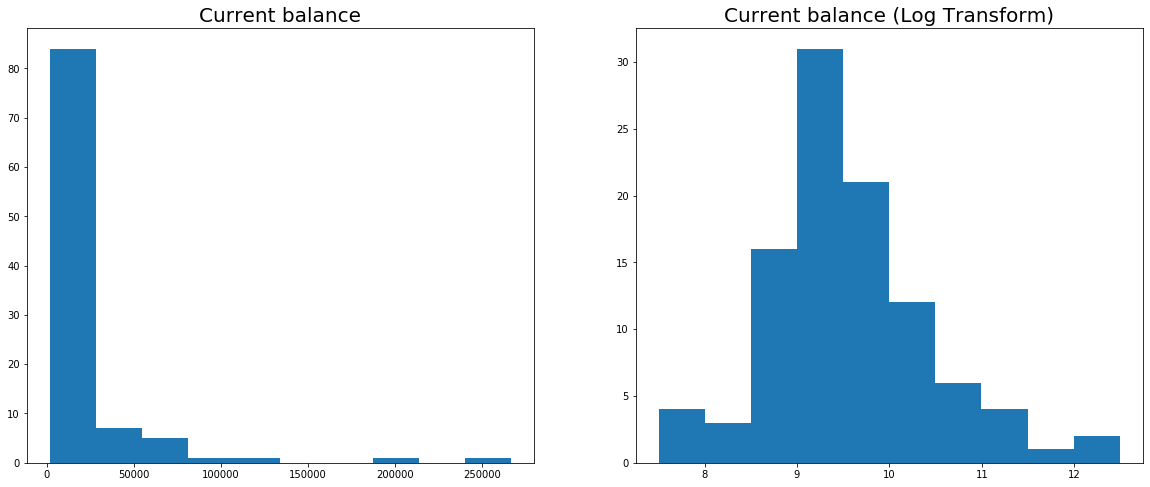

In [19]:
# Current balance

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=[20,8])

ax1.hist(df.current_balance)
ax1.set_title("Current balance",fontsize=20)
ax2.hist(np.log(df.current_balance))
ax2.set_title("Current balance (Log Transform)",fontsize=20);

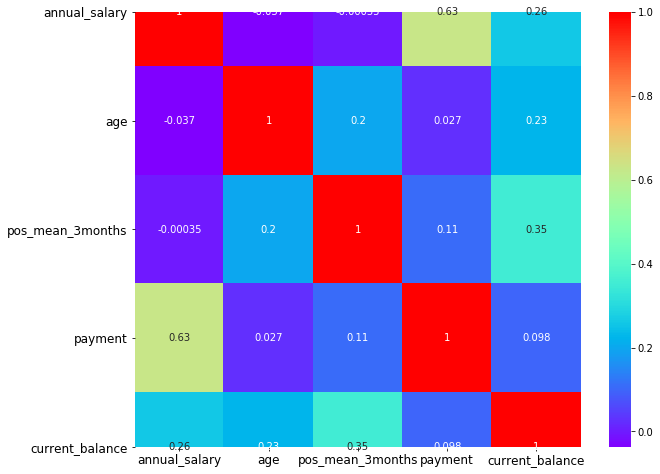

In [20]:
# Correlation Heatmap

plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,rotation=360);

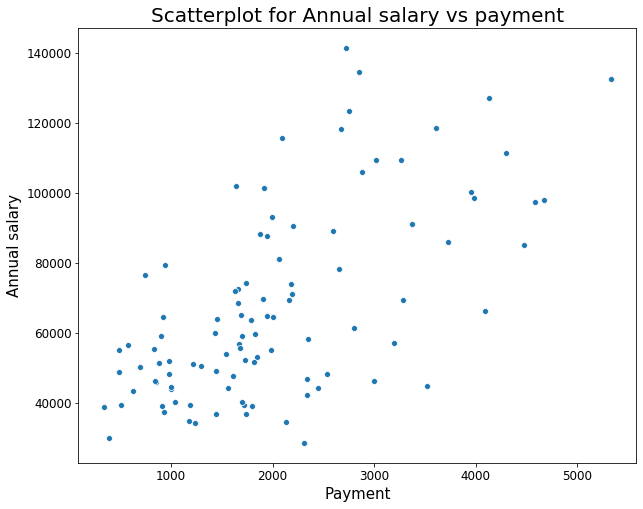

In [21]:
# Scatterplot payment vs annual salary

plt.figure(figsize=[10,8])
sns.scatterplot(df['payment'],df['annual_salary'])
plt.title("Scatterplot for Annual salary vs payment",fontsize=20)
plt.xlabel("Payment",fontsize=15)
plt.ylabel("Annual salary",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Variable Transformation

In [22]:
# Transforming variables 

df.age = np.log(df.age)
df.pos_mean_3months = np.log(df.pos_mean_3months)
df.payment = np.sqrt(df.payment)
df.current_balance = np.log(df.current_balance)

In [23]:
# Splitting features and target

X = df.drop('annual_salary',axis=1)
y = df.annual_salary

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
# Scaling data

minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

# Models

In [29]:
# Linear Regression

linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

14388.477394979156

In [35]:
# Decision Tree 

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
np.sqrt(mean_squared_error(y_test,dt_pred))

16976.233368057783